In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Data cleaning
#EDA
#Data Preprocessing
#Model building
#Model Evaluation


In [3]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1295,ham,TELL HER I SAID EAT SHIT.,NaN,NaN,NaN
1522,ham,I thk u dun haf 2 hint in e forum already lor....,NaN,NaN,NaN
1456,ham,U sleeping now.. Or you going to take? Haha.. ...,NaN,NaN,NaN
5053,spam,Double Mins & Double Txt & 1/2 price Linerenta...,NaN,NaN,NaN
4508,ham,ÌÏ takin linear algebra today?,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# Drop the last three columns
df = df.iloc[:, :2]

# Rename columns
df.columns = ["target", "text"]

# Display the first few rows
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df["target"] = df["target"].map({"spam": 1, "ham": 0})

# Display the first few rows
print(df.head())

   target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


In [7]:
# Check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(403)

In [9]:
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
df.shape

(5572, 2)

In [11]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.shape

(5572, 2)

In [13]:
df.duplicated().sum()

np.int64(403)

In [14]:
df = df.drop_duplicates(keep="first")

In [15]:
df.shape

(5169, 2)

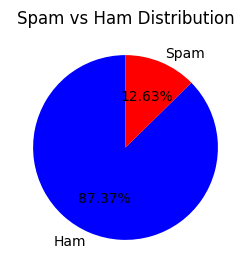

In [16]:
target_counts = df["target"].value_counts()
# Plot the distribution using a pie chart
plt.figure(figsize=(3, 3))
plt.pie(target_counts, labels=["Ham", "Spam"], autopct="%1.2f%%", colors=["blue", "red"], startangle=90)
plt.title("Spam vs Ham Distribution")
plt.show()

In [17]:
#Data is imbalanced

In [18]:
df['num_characters'] = df['text'].apply(len)

# Add number of words
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
# Display updated DataFrame
df.head(3)


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28


In [19]:
def count_sentences(text):
    return sum(text.count(p) for p in ['.', '?'])

df['num_sentences'] = df['text'].apply(lambda x: count_sentences(str(x)))
df.head(5)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,8
1,0,Ok lar... Joking wif u oni...,29,6,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [20]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.220739
std,58.236293,11.068488,2.583854
min,2.000000,1.000000,0.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,42.000000


In [21]:
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,2.209477
std,56.358207,11.116240,2.681376
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,3.000000
max,910.000000,171.000000,42.000000


In [22]:
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.298622
std,30.137753,5.967672,1.767450
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,1.000000
50%,149.000000,25.000000,2.000000
75%,157.000000,28.000000,3.000000
max,224.000000,35.000000,13.000000


<Axes: xlabel='num_characters', ylabel='Count'>

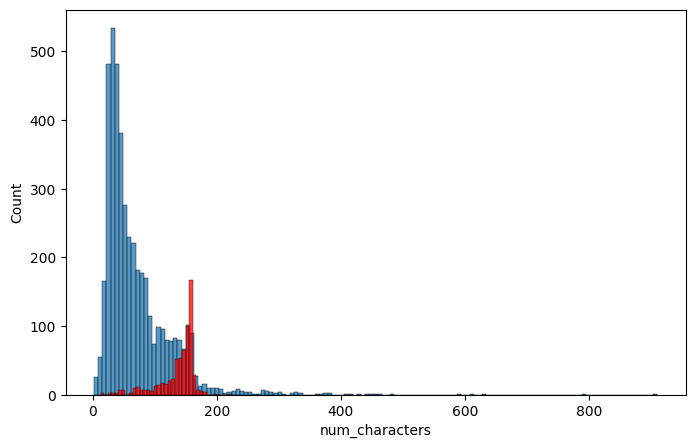

In [23]:
import seaborn as sns

plt.figure(figsize=(8,5),)
sns.histplot(df[df["target"]==0]["num_characters"],)
sns.histplot(df[df["target"]==1]["num_characters"],color="red")


<Axes: xlabel='num_words', ylabel='Count'>

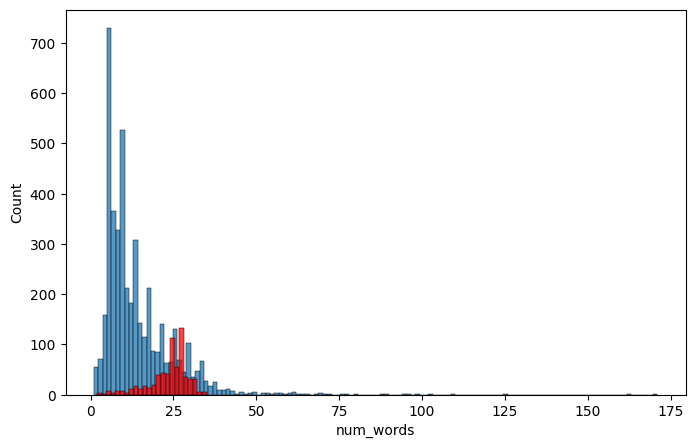

In [24]:
plt.figure(figsize=(8,5),)
sns.histplot(df[df["target"]==0]["num_words"],)
sns.histplot(df[df["target"]==1]["num_words"],color="red")

<Axes: xlabel='num_sentences', ylabel='Count'>

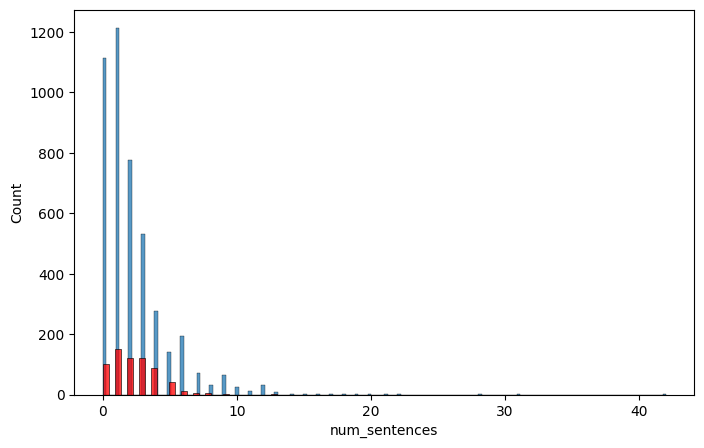

In [25]:
plt.figure(figsize=(8,5),)
sns.histplot(df[df["target"]==0]["num_sentences"],)
sns.histplot(df[df["target"]==1]["num_sentences"],color="red")

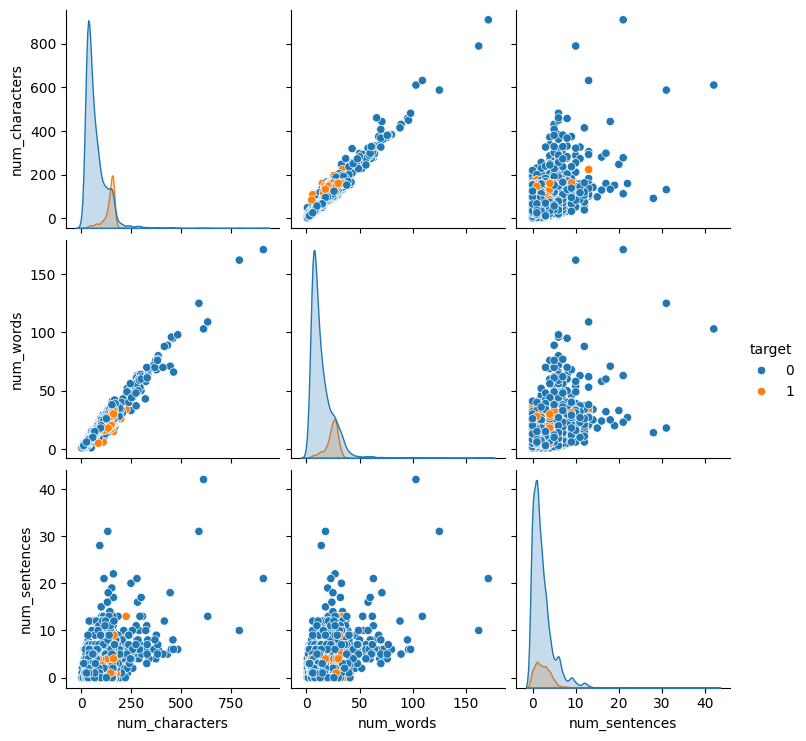

In [26]:
sns.pairplot(df,hue="target")

<Axes: >

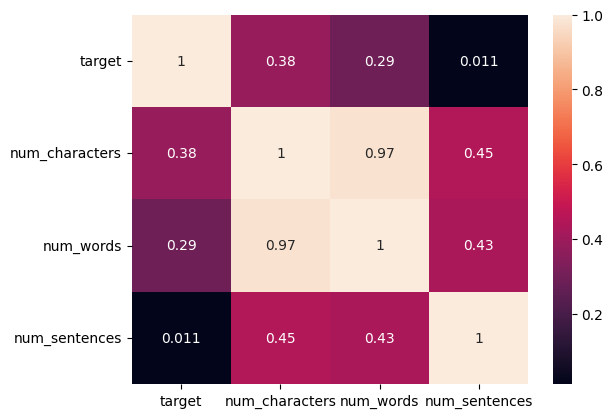

In [27]:
df_numeric = df.drop(columns=['text'])
sns.heatmap(df_numeric.corr(), annot=True)


## Data Preprocessing Steps

1. **Lowercase**: 
   - Convert all text to lowercase to maintain uniformity and ensure case-insensitivity during analysis.

2. **Tokenization**: 
   - Split the text into individual words or tokens. This allows for easier manipulation and analysis of the text.

3. **Remove Special Characters**: 
   - Remove any characters that are not alphanumeric or spaces (e.g., @, #, $, %, etc.) to focus on meaningful words.

4. **Remove Stop Words and Punctuation**: 
   - Stop words (e.g., "the", "is", "in") and punctuation marks (e.g., commas, periods) are removed since they do not add significant meaning to the analysis.

5. **Stemming**: 
   - Reduce words to their root form (e.g., "running" to "run", "happily" to "happy") to ensure that different variations of a word are treated as a single entity.


In [28]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\IT
[nltk_data]     World\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [29]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer() 


In [30]:
from nltk.tokenize import word_tokenize
import string


def data_preprocessing(text):
    text = text.lower()
    text = word_tokenize(text,language="english", preserve_line=False)  # Tokenization

    y = []
    for i in text:
        if i.isalnum():  # Keep only alphanumeric tokens
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

# Test it
y = "Hi! I loved the YT lectures on machine learning"
print(data_preprocessing(y))


hi love yt lectur machin learn


### Stemming

In [31]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("Dancing")

'danc'

In [32]:
df["transformed_text"]=df["text"].apply(data_preprocessing)

In [33]:
df.head(4)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,8,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,6,u dun say earli hor u c alreadi say


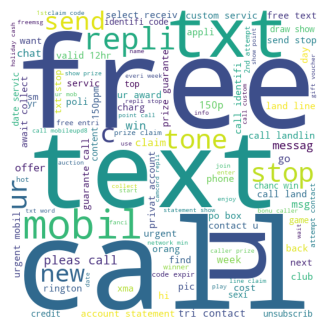

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object with specified parameters
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Generate word cloud only for spam messages (target == 1)
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

# Display the word cloud
plt.figure(figsize=(4, 4))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()


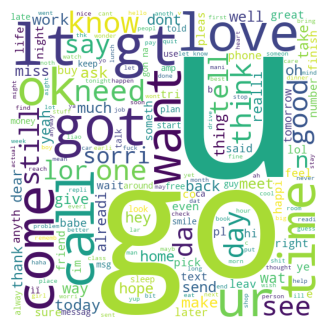

In [35]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

# Display the word cloud
plt.figure(figsize=(4, 4))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

In [36]:
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [37]:
len(spam_corpus)

9939

In [38]:
from collections import Counter

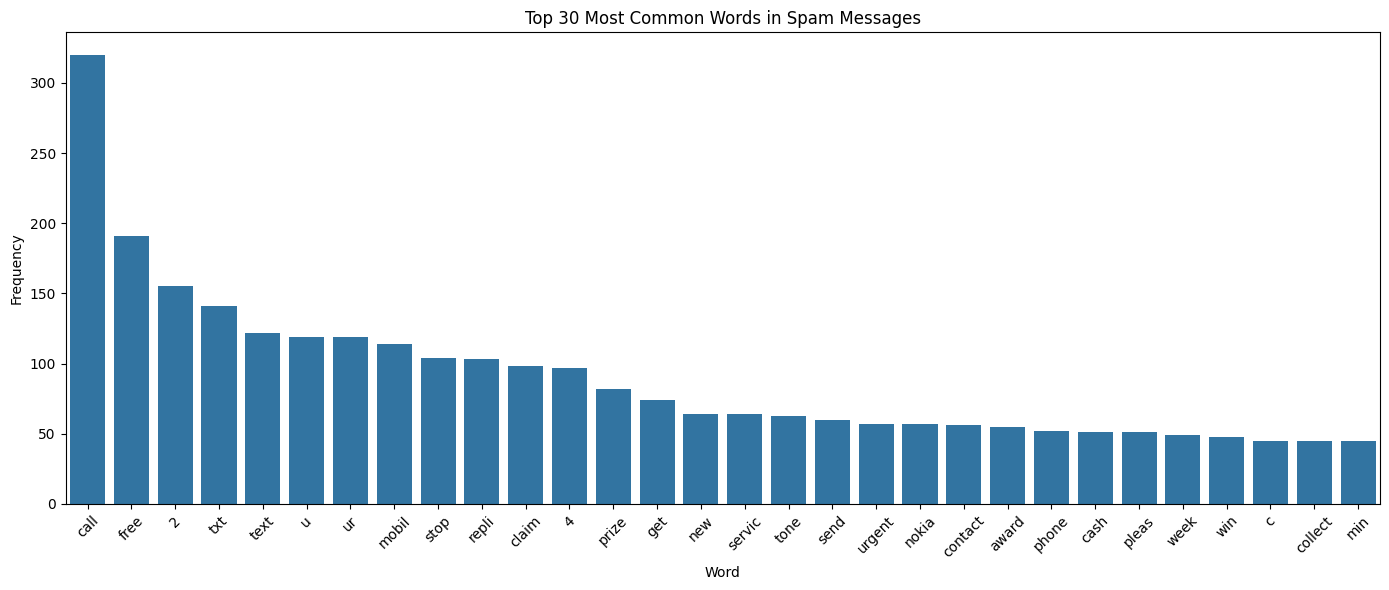

In [39]:
# Get the 30 most common words in spam messages
spam_words = Counter(spam_corpus).most_common(30)

# Create DataFrame
spam_df = pd.DataFrame(spam_words, columns=['Word', 'Frequency'])

# Plot vertical barplot
plt.figure(figsize=(14, 6))
sns.barplot(x='Word', y='Frequency', data=spam_df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Top 30 Most Common Words in Spam Messages')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [40]:
ham_corpus=[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

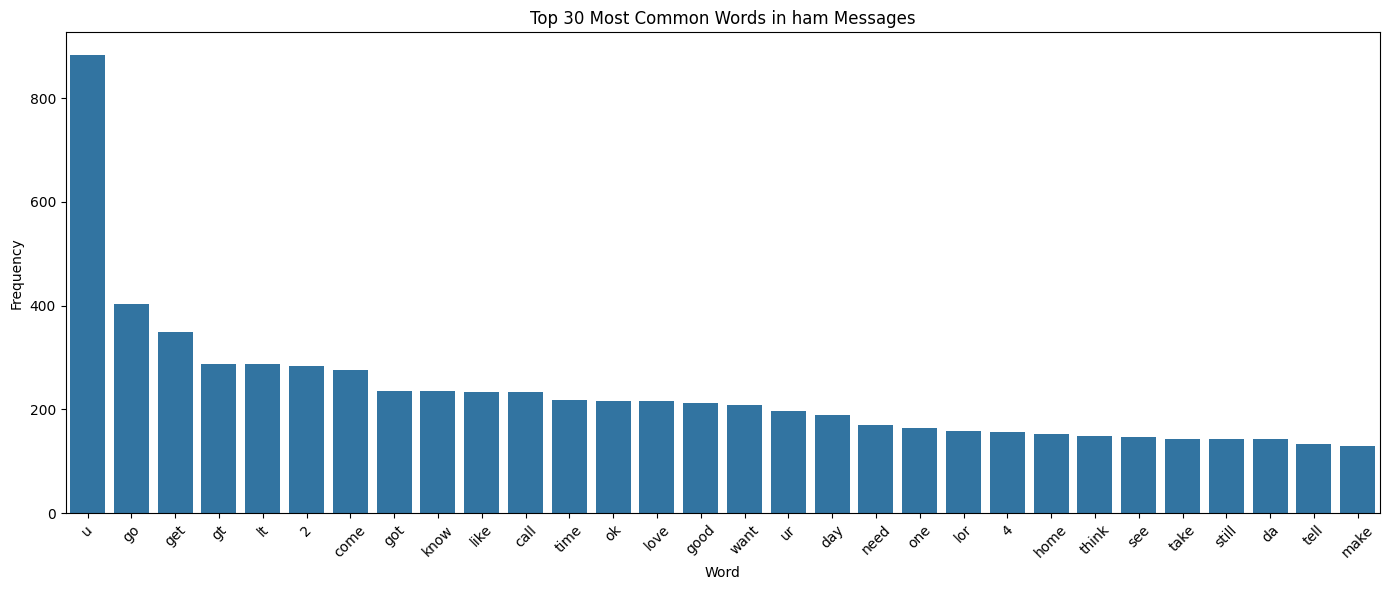

In [41]:
# Get the 30 most common words in spam messages
ham_words = Counter(ham_corpus).most_common(30)

# Create DataFrame
ham_df = pd.DataFrame(ham_words, columns=['Word', 'Frequency'])

# Plot vertical barplot
plt.figure(figsize=(14, 6))
sns.barplot(x='Word', y='Frequency', data=ham_df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Top 30 Most Common Words in ham Messages')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Model Building 

In [42]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tdidf=TfidfVectorizer()

### By using Count vectorizer

In [43]:
x=cv.fit_transform(df["transformed_text"]).toarray()

In [44]:
y=df["target"].values

In [45]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [47]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [48]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [49]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [50]:
mnb.fit(x_train,y_train)
y_pred1=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [51]:
bnb.fit(x_train,y_train)
y_pred1=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### USING TFIDF

In [52]:
X=tdidf.fit_transform(df["transformed_text"]).toarray()

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [55]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [56]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [57]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9642166344294004
[[884  12]
 [ 25 113]]
0.904


In [58]:
bnb.fit(x_train,y_train)
y_pred1=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [60]:
svc  = SVC(kernel='sigmoid', gamma=1.0)
knc  = KNeighborsClassifier()
mnb  = MultinomialNB()
dtc  = DecisionTreeClassifier(max_depth=5)
lrc  = LogisticRegression(solver='liblinear', penalty='l1')
rfc  = RandomForestClassifier(n_estimators=50, random_state=2)
abc  = AdaBoostClassifier(n_estimators=50, random_state=2)
bc   = BaggingClassifier(n_estimators=50, random_state=2)
etc  = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb  = XGBClassifier(n_estimators=50, random_state=2)


In [61]:
clfs = {
    'SVC'     : svc,
    'KN'      : knc,
    'NB'      : mnb,
    'DT'      : dtc,
    'LR'      : lrc,
    'RF'      : rfc,
    'AdaBoost': abc,
    'BgC'     : bc,
    'ETC'     : etc,
    'GBDT'    : gbdt,
    'xgb'     : xgb
}


In [62]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)                      # Train the classifier
    y_pred = clf.predict(X_test)                   # Predict labels for test data
    accuracy = accuracy_score(y_test, y_pred)      # Calculate accuracy
    precision = precision_score(y_test, y_pred)    # Calculate precision
    return accuracy, precision                     # Return both metrics


In [63]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy - 0.9729206963249516
Precision - 0.9741379310344828
For KN
Accuracy - 0.9003868471953579
Precision - 1.0
For NB
Accuracy - 0.9593810444874274
Precision - 1.0
For DT
Accuracy - 0.9342359767891683
Precision - 0.8301886792452831
For LR
Accuracy - 0.9516441005802708
Precision - 0.94
For RF
Accuracy - 0.971953578336557
Precision - 1.0
For AdaBoost
Accuracy - 0.9245647969052224
Precision - 0.8409090909090909
For BgC
Accuracy - 0.9584139264990329
Precision - 0.8625954198473282
For ETC
Accuracy - 0.9729206963249516
Precision - 0.9824561403508771
For GBDT
Accuracy - 0.9526112185686654
Precision - 0.9238095238095239
For xgb
Accuracy - 0.9748549323017408
Precision - 0.9516129032258065


In [64]:
# Create the DataFrame
results_df = pd.DataFrame({
    '📌 Classifier': list(clfs.keys()),
    '✅ Accuracy (%)': [round(score * 100, 2) for score in accuracy_scores],
    '🎯 Precision (%)': [round(score * 100, 2) for score in precision_scores]
})

# Sort by Accuracy (optional)
results_df = results_df.sort_values(by='✅ Accuracy (%)', ascending=False).reset_index(drop=True)

# Display the DataFrame
print("\n🔍 Model Evaluation Results:")
print(results_df)


🔍 Model Evaluation Results:
   📌 Classifier  ✅ Accuracy (%)  🎯 Precision (%)
0           xgb           97.49            95.16
1           ETC           97.29            98.25
2           SVC           97.29            97.41
3            RF           97.20           100.00
4            NB           95.94           100.00
5           BgC           95.84            86.26
6          GBDT           95.26            92.38
7            LR           95.16            94.00
8            DT           93.42            83.02
9      AdaBoost           92.46            84.09
10           KN           90.04           100.00


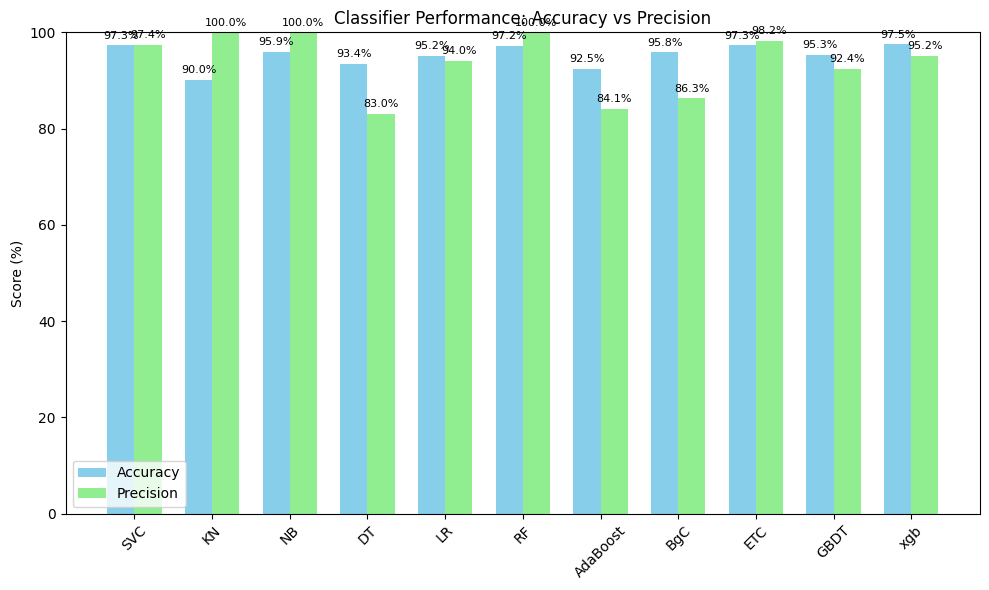

In [65]:
classifiers = list(clfs.keys())

# Convert scores to percentage and round
acc_percent = [round(score * 100, 2) for score in accuracy_scores]
prec_percent = [round(score * 100, 2) for score in precision_scores]

# Set positions for bars
x = np.arange(len(classifiers))
width = 0.35  # width of the bars

# Create the plot
plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, acc_percent, width, label='Accuracy', color='skyblue')
bars2 = plt.bar(x + width/2, prec_percent, width, label='Precision', color='lightgreen')

# Add labels and title
plt.ylabel('Score (%)')
plt.title('Classifier Performance: Accuracy vs Precision')
plt.xticks(x, classifiers, rotation=45)
plt.ylim(0, 100)
plt.legend()

# Annotate bars with values
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


## Model Improvement

Alright! Imagine you're playing a game with your friends where everyone has to guess whether an animal is a **cat** or a **dog**. You ask three of your smart friends for their opinions:

1. **Sami** (SVC) looks at the ears 🐾  
2. **Nina** (Naive Bayes) listens to the sounds 🐶  
3. **Ali** (Extra Trees) checks the tail 🐕

Now, instead of trusting just **one** friend, you decide to **ask all three**, and go with the **majority vote** — kind of like a mini-election!

---

### Two Ways to Vote:
- 🗳️ **Hard Voting**: Each friend says just “cat” or “dog”, and the one with the most votes wins.
- 🧠 **Soft Voting**: Each friend gives you a **confidence score** (like “I'm 90% sure it's a cat”), and you pick the one with the highest total confidence.

---

### Why It’s Cool:
- If one friend is wrong, the others might still be right — so together, they make better guesses.
- This is called a **Voting Classifier** in machine learning — it's like teamwork for smart computer models! 🤝💻

---

Want me to show how each friend (model) guesses and what the team decides together? 🐱🐶

In [66]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier


# Define individual classifiers
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# Create a soft voting ensemble
voting = VotingClassifier(
    estimators=[
        ('svm', svc),
        ('nb', mnb),
        ('et', etc)
    ],
    voting='soft'
)

# Fit the voting classifier to the training data
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [67]:
y_pred=voting.predict(X_test)
print("Accuracy Score: " ,accuracy_score(y_test,y_pred))
print("Precision score: ",precision_score(y_test,y_pred))

Accuracy Score:  0.9796905222437138
Precision score:  1.0


## Apply Stacking

Of course! Let me explain **stacking** like you're a curious kid 😊

---

### 🧠 **What is Stacking?**

Imagine you're trying to decide if a fruit is an **apple** or an **orange**.

You ask:
- 🍎 **Sami** (who looks at color),
- 🍊 **Nina** (who checks the shape),
- 🍏 **Ali** (who smells it).

Each one gives their **own guess**.

But instead of choosing based on just their guesses...

👉 You ask a **super smart coach** — let’s call him **Coach Leo** — to **look at all their guesses** and then make the **final decision**.

---

### 🧩 Real-life Stacking:
- Sami, Nina, and Ali = **Base Models**
- Coach Leo = **Meta Model** (a model trained to decide using other models' guesses)

---

### 📦 Why It’s Called “Stacking”?
Because we are **stacking models on top of each other**:
1. Bottom layer → Base models
2. Top layer → Final decision maker (meta-model)

They all work together like a **team**, but one is in charge of the final call! 🤝👨‍🏫

---

Want a diagram of this too? I can draw it for you! 🖼️

In [68]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

# Base learners (your smart friends)
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# Meta-learner (the coach!)
meta_learner = LogisticRegression()

# Build the stacking classifier
stacking = StackingClassifier(
    estimators=[
        ('svm', svc),
        ('nb', mnb),
        ('et', etc)
    ],
    final_estimator=meta_learner,
    passthrough=True  # Optionally pass original features to meta-learner
)

# Fit the stacking model
stacking.fit(X_train, y_train)

# Predict on test data
y_pred = stacking.predict(X_test)


In [69]:
accuracy, precision = train_classifier(stacking, X_train, y_train, X_test, y_test)


In [70]:
print(accuracy)
print(precision)

0.9816247582205029
0.9612403100775194


In [71]:
import pickle
pickle.dump(tdidf,open("vectorizer.pkl","wb"))
pickle.dump(mnb,open("model.pkl","wb"))


In [72]:
# Save the model to a file
with open('voting_classifier_model.pkl', 'wb') as file:
    pickle.dump(voting, file)